In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
# Read the dataset from a CSV file
df = pd.read_csv('Boston-house-price-data.csv')

In [3]:
df.shape

(506, 14)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(14, 14)

<Axes: >

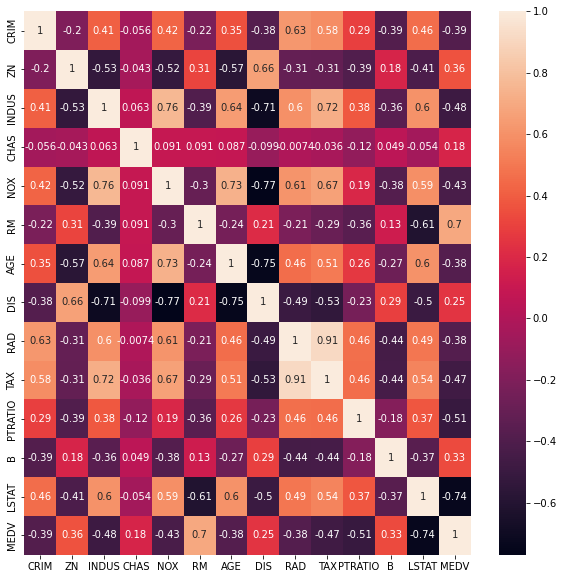

In [9]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [10]:
# Separate features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [11]:
X.shape

(506, 13)

In [12]:
y.shape

(506,)

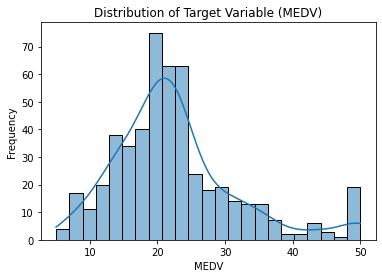

In [13]:
# Visualize the target variable
sns.histplot(y, kde=True)
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable (MEDV)')
plt.show()

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Data cleaning
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Build the linear regression model using a deep neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [17]:
# Compile the model and specify the loss function and optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
# Train the model on the training data
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 606.6292
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 575.7861
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 540.8281
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 494.9137
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 436.0335
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 363.3076
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 281.8015
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 202.1618
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 137.3688
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 95.9679
Epoch 11/100
13/13 [==============================] - 0s 1ms/step - loss: 69.3981
Epoch 12/100
13/13 [==============================] - 0s 1ms/step - loss: 54.9765
Epoch 13/100
13/

In [19]:
# Evaluate the model on the test data
loss = model.evaluate(X_test_scaled, y_test, verbose=1)
print('Mean Squared Error on test set:', loss)

4/4 [==============================] - 0s 2ms/step - loss: 10.3615
Mean Squared Error on test set: 10.36152172088623


In [20]:
# Predicting Test data with the model
y_test_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 1ms/step


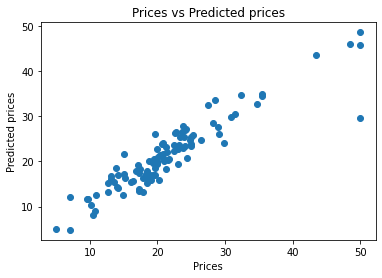

In [21]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [22]:
# Model Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 2.176496985379387
MSE: 10.361522467130175
RMSE: 3.218931882959031


In [ ]:
# Outlier detection and removal
# Calculate the IQR (interquartile range) for each feature
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for the outlier detection
threshold = 1.5

# Remove the outliers from the dataset
features_no_outliers = X[~((X < (Q1 - threshold * IQR)) | (X > (Q3 + threshold * IQR))).any(axis=1)]
target_no_outliers = y[~((X < (Q1 - threshold * IQR)) | (X > (Q3 + threshold * IQR))).any(axis=1)]

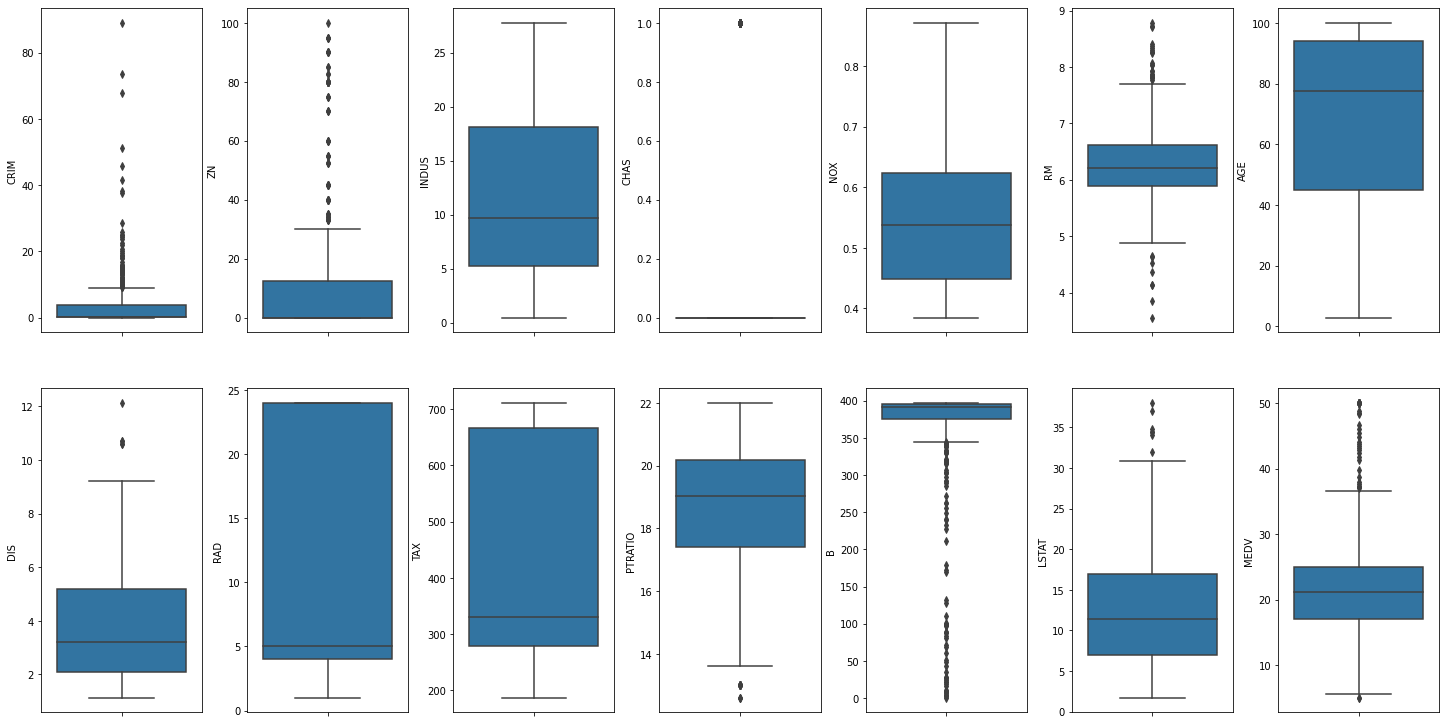

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [24]:
    for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [ ]:
df = df[~(df['PRICE'] >= 35.0)]
print(np.shape(df))